## Homework 3: Classification and Regularization


 This assignment is based on the classification concepts you have covered
in class. The implementation of these is handled by the tools provided by
Python. This assignment tests your concepts in terms of how you approach
classification problems.

This is an individual assignment. No collaboration is allowed, and if 
discovered, will be reported.

<b> Total: 150 marks </b>

## Question 1: Binary Classification (70 marks)

For this part of the assignment, you will be using the Autism dataset
provided to you. You have to classify whether an adult has autism or not
based on the data provided.

You will be using the dataset "autism.csv", which will be provided to you. Go through the README file for this dataset, which will give you a better idea about the data and its attributes.


In [337]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

df = pd.read_csv("autism.csv")

# Take a quick look at the data

df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [338]:
# Here's another look at it

df.tail()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,703,1,0,0,1,1,0,1,0,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO
703,704,1,0,1,1,1,0,1,1,1,...,f,White-European,no,no,Cyprus,no,8,18 and more,Self,YES


## Part 1a: Short questions (5 marks)

Q. What is the target variable?

A. Whether or not a person has Autism is the target variable, represented by the (Class/ASD) column in the dataframe.


Q. Out of the ones you have learnt, what kind of classification will you use?

A. Binary Classification using Logistic regression, because the target variable is categorical and binary.


## Part 1b: Preprocessing (5 marks)
By now, you should have an idea about what you are supposed to do.
Carry out any preprocessing or data cleaning you feel is necessary in this part. 
State why you carried out these steps (if any).


In [339]:
# Preprocess your data

# the missing information seems to be represented by a '?', or 'Others' in case of the 'relation' column
df = df.replace('?', np.NaN)

# checking for any null values
df.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jaundice            0
autism              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [340]:
df.isnull().sum().sum()

192

Since the dataset is only 700 odd rows, removing 192 rows would be problematic. I will try to find some other way to deal with the missing values.

In [341]:
# chceking the diffrent catagories in the columns
cols = list(df.columns)
cols.remove('id')
cols.remove('country_of_res')

print("countries:\n", np.unique(df['country_of_res'].astype('str').values))
#print("ids:\n", np.unique(df['id'].astype('str').values))

print("relation:\n", np.unique(df['relation'].astype('str').values))
print("The rest of the catagories:\n", np.unique(df[cols].astype('str').values))

# my guess is that most of the information has been enforced by the app to be entered by the user

# imputing for missing values:

# I'm going to make the missing value a hyperparameter, and test on different missing value imputions
# for now, I'm going to let '?' represent missing value, which in itself affords less bias than replacing it with 0s
# or 1s or the mean or median of the column would.

countries:
 ['Afghanistan' 'AmericanSamoa' 'Angola' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Belgium'
 'Bolivia' 'Brazil' 'Burundi' 'Canada' 'Chile' 'China' 'Costa Rica'
 'Cyprus' 'Czech Republic' 'Ecuador' 'Egypt' 'Ethiopia' 'Finland' 'France'
 'Germany' 'Hong Kong' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Italy' 'Japan' 'Jordan' 'Kazakhstan' 'Lebanon' 'Malaysia'
 'Mexico' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua' 'Niger' 'Oman'
 'Pakistan' 'Philippines' 'Portugal' 'Romania' 'Russia' 'Saudi Arabia'
 'Serbia' 'Sierra Leone' 'South Africa' 'Spain' 'Sri Lanka' 'Sweden'
 'Tonga' 'Turkey' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Viet Nam']
relation:
 ['Health care professional' 'Others' 'Parent' 'Relative' 'Self' 'nan']
The rest of the catagories:
 ['0' '1' '10' '17' '18' '18 and more' '19' '2' '20' '21' '22' '23' '24'
 '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '

In [342]:
np.unique(df['age_desc'].astype('str').values)

array(['18 and more'], dtype=object)

In [343]:
# the age_desc does not offer any valuable information for regression since it has only one entry for the 
# entire dataset so it can safely be removed from the logistic regression, although it is still important 
# to keep in mind, because our analysis can not claim anything about predicting autism in people below 18
# years of age, because the sample is not representitive of that part of the population.

# unique id is also not encoding any relevant information for regression so drop that as well

df = df.drop(['age_desc'], axis=1)
df = df.drop(['id'], axis=1)

Dealing with (imputing) missing valeus for age, ethnicity and relation. One hot encoding can take care of this in the case of ethnicity anf relation by making a dummy variable for NaNs. For age, I will impute for age by calculating the mean of the age column. 

In [344]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,NaN,no,no,Egypt,no,2,NaN,NO
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,9,Self,YES
6,0,1,0,0,0,0,0,1,0,0,17,f,Black,no,no,United States,no,2,Self,NO
7,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,New Zealand,no,5,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,United States,no,6,Self,NO
9,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,8,Health care professional,YES


In [345]:
imp = Imputer() #checks for NaNs and uses the mean strategy as default
imp.fit(df['age'].values.reshape(-1, 1))
df['age'] = imp.transform(df['age'].values.reshape(-1, 1))

df['age'].isnull().sum()

0

In [346]:
# Catagorical Data, gender. ethnicity, jaundice, autism, country_of_res, used_app_before, result relation, Class/ASD

df['age'] = pd.to_numeric(df['age'])

np.unique(df['age'].values)

array([ 17.       ,  18.       ,  19.       ,  20.       ,  21.       ,
        22.       ,  23.       ,  24.       ,  25.       ,  26.       ,
        27.       ,  28.       ,  29.       ,  29.6980057,  30.       ,
        31.       ,  32.       ,  33.       ,  34.       ,  35.       ,
        36.       ,  37.       ,  38.       ,  39.       ,  40.       ,
        41.       ,  42.       ,  43.       ,  44.       ,  45.       ,
        46.       ,  47.       ,  48.       ,  49.       ,  50.       ,
        51.       ,  52.       ,  53.       ,  54.       ,  55.       ,
        56.       ,  58.       ,  59.       ,  60.       ,  61.       ,
        64.       , 383.       ])

In [347]:
# removing age 383

df['age'].replace(to_replace = 383, value = np.NaN, inplace = True)
mean_age = df['age'].mean()
df['age'] = df['age'].replace(to_replace = np.NaN, value = mean_age)
df['age'] = df['age'].round(0)

np.unique(df['age'].values)

array([17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 58., 59., 60., 61., 64.])

In [348]:
# using 0, 1 encoding for binary column and one hot for classes with more than 2 categories

binCols = ['jaundice', 'autism', 'used_app_before']

for col in binCols:
    df[col] = df[col].map( {'no':0, 'yes':1} )

df['gender'] = df['gender'].map( {'f':1, 'm':0} )
df['Class/ASD'] = df['Class/ASD'].map( {'YES':1, 'NO':0} )

data = df.copy()
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,1,White-European,0,0,United States,0,6,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,0,Latino,0,1,Brazil,0,5,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,0,Latino,1,1,Spain,0,8,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,1,White-European,0,1,United States,0,6,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,1,NaN,0,0,Egypt,0,2,NaN,0
5,1,1,1,1,1,0,1,1,1,1,36.0,0,Others,1,0,United States,0,9,Self,1
6,0,1,0,0,0,0,0,1,0,0,17.0,1,Black,0,0,United States,0,2,Self,0
7,1,1,1,1,0,0,0,0,1,0,64.0,0,White-European,0,0,New Zealand,0,5,Parent,0
8,1,1,0,0,1,0,0,1,1,1,29.0,0,White-European,0,0,United States,0,6,Self,0
9,1,1,1,1,0,1,1,1,1,0,17.0,0,Asian,1,1,Bahamas,0,8,Health care professional,1


In [349]:
# One Hot Encoding for the rest
# Including a One Hot Encoding for NaNs

df = pd.get_dummies(df, dummy_na = True)
cols = list(df.columns)
len(cols)

103

In [350]:
print("Number of NaNs: ", df.isnull().sum().sum())
df.head()

Number of NaNs:  0


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,country_of_res_United States,country_of_res_Uruguay,country_of_res_Viet Nam,country_of_res_nan,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self,relation_nan
0,1,1,1,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Checking to see of the 'result' is a linear combination of the A1-A10 scores.

In [351]:
# Regression on A1-A10 to predict 'result'.
from sklearn.linear_model import LinearRegression

scores = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', \
          'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score' ]

X = df[scores]
y = df['result']

regr = LinearRegression()
regr.fit(X, y)

print(regr.score(X, y))
print(regr.coef_)

1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


The result is a linear combination of the A1-A10 scores hence the column can be dropped, and infact if it is not dropped it may introduce some noise because the weights of the classification will not be unique, several ratios of weights will end up giving same (very close) results and the model might end up picking a weight vector that gives a slighty better result (in the decimal places), with a large weight for 'result' column and low wieghts for scores columns etc. While regulerization would help resolve this issue, it is best to just remove this column because it is not introducing any new information.

In [352]:
df = df.drop('result', axis=1)
df.size

71808

## Part 1c: Visualization (5 marks)

In [353]:
# Visualize the relationships between all the variables to get a glimpse
# of any potential correlations.

Text(0.5,1,'gender and ethnicity')

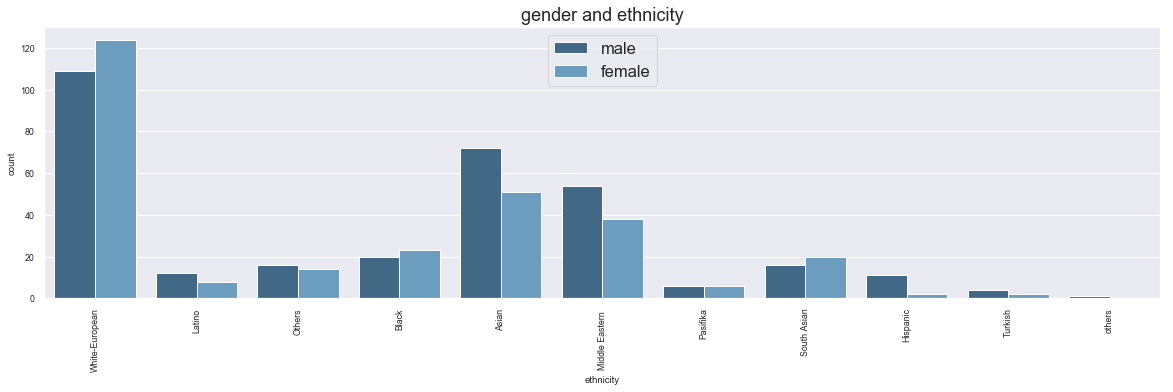

In [354]:
# checking to see the districbution of data by ethnicity and gender, to get an idea of the
# variation of the sample size (whether it is a good sample)

fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale = 1.5)

ax = sns.countplot(x="ethnicity",
                   hue='gender',
                   data=data,
                   palette="Blues_d")

ax.legend(['male', 'female'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('gender and ethnicity')

fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale = 1.5)

scores_count = []

for score in scores:
    scores_count.append(list(data.groupby(['Class/ASD']).sum()[score]))

scores_count = pd.DataFrame(scores_count, columns = ['No', 'Yes'])
scores_count['Score_Type'] = pd.Series(scores)

scores_count = pd.melt(scores_count, id_vars='Score_Type', var_name="Count", value_name="Autism")
scores_count["Score_Type2"] = scores_count["Score_Type"]

df1 = scores_count.pivot("Score_Type", "Score_Type2", "Autism")
df1

df1 = scores_count.iloc[10:20].reindex(['Score_Type','Score_Type', 'Autism'], axis=1)
df1.loc['Autism'] = df.loc['Autism'].astype(float) 

ax = sns.heatmap(df1.dropna(axis=1))


ax = sns.heatmap(x='Score_Type',
                 y='Score_Type',
                 hue='Count',
                 data=scores_count,
                 palette="hot",
                 alpha=1)

ax.set(xlabel='', ylabel='Number of cases of autism')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

The distribution of gender by ethnicity seems to be faily even, although there isn't an even distriburion of data by ethnicity, but that might not be a requirement for this assessment.

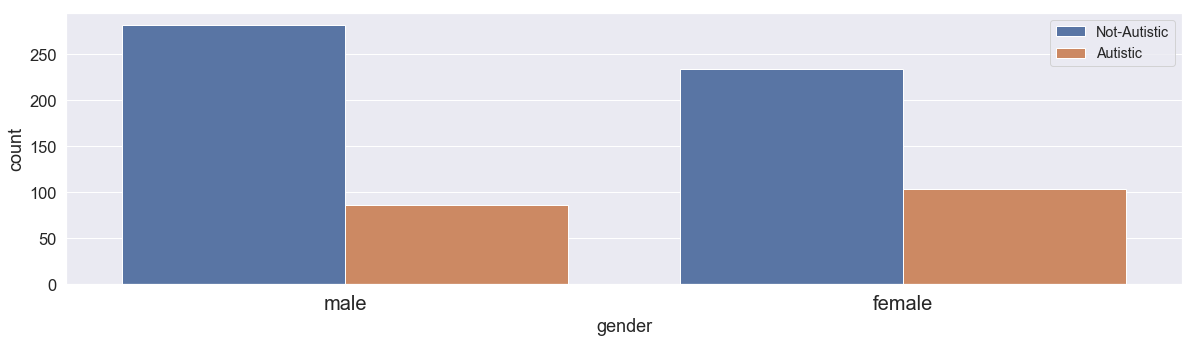

In [355]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale = 1.3)

ax = sns.countplot(x="gender",
                   hue='Class/ASD',
                   data=data
                )

ax.set_xticklabels(['male', 'female'], fontsize=20)
ax.legend(['Not-Autistic', 'Autistic']) 

While there is an even distribution of men and women in the sample, it seems that a larger pencentage of women are classified as autistic then men.

Moving on ...

#### Lets see if a correlation exits between previusly classified with Autism and Class/ASD.

autism  Class/ASD
0       0            467
        1            146
1       0             48
        1             43
dtype: int64


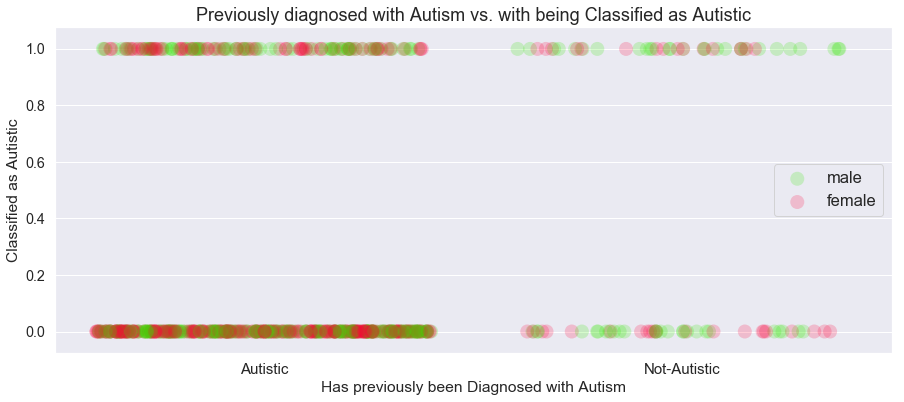

In [356]:
fig, ax = plt.subplots(figsize=(15,6))
sns.set(font_scale = 1.5)

ax = sns.stripplot('autism',
                'Class/ASD',
                hue = 'gender',
                data = data,
                palette = "prism_r",
                jitter = 0.4,
                size=14,
                alpha=.2
                )

ax.set_xticklabels(['Autistic', 'Not-Autistic'], fontsize=15)
ax.legend(['male', 'female']) 

ax.set_title("Previously diagnosed with Autism vs. with being Classified as Autistic")
ax.set(xlabel='Has previously been Diagnosed with Autism', ylabel='Classified as Autistic')

print(data.groupby(['autism', 'Class/ASD']).size())

Seems that the data is biased in the sense that people who have not been previously diagniosed with autism are using the app more, from amongst these people fewer (146) of them are classified as autistic (vs 467) who are not.

While there are much fewer data points for people who have previously been classified as autistic before taking the test, they seem to be evenly distributed (48 vs 43) in terms of being classified as autistic and as not-Autistic by the given metrics.

The gender distribution, again seems to be pretty even, the red and blue dots are evenly distributed in all cases.

### looking at the correlation between 'result' from the test and whether subject is categorized as autistic by the app: 'Class/ASD', by age.

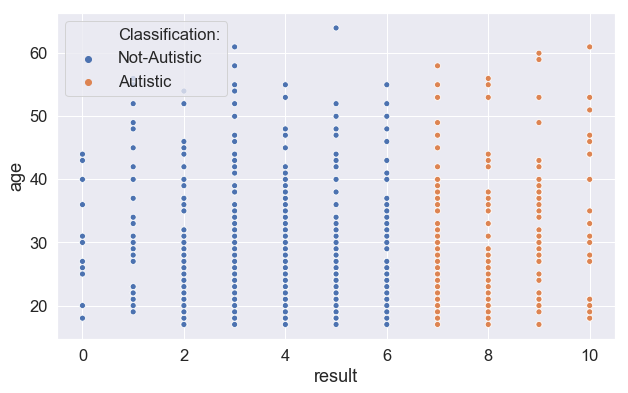

In [357]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.scatterplot('result',
                'age',
                hue = 'Class/ASD',
                data = data,
                )

labels = ['Classification:', 'Not-Autistic', 'Autistic']
for t, l in zip(ax.legend_.texts, labels): t.set_text(l)

This shows that the result splits the data such that those people with a result above 6 are classified as autistic and those below are classified as not-Autistic. The Class/ASD is entirely dependant on the result column.

Most of the data points are for age group (18-35).

### correlation between jaundice and autism

[Text(0,0,'Born without Jaundice'), Text(0,0,'Born with Jaundice')]

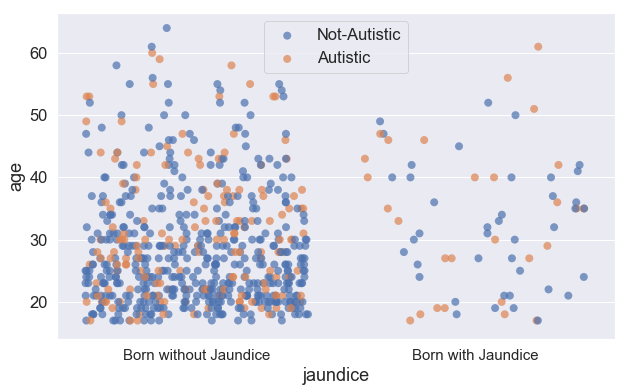

In [358]:
fig, ax = plt.subplots(figsize=(10,6))

# adding the age factor to create a jitter effect in the y-axis
ax = sns.stripplot('jaundice',
                'age',
                hue = 'Class/ASD',
                jitter = 0.4,
                data = data,
                size=8,
                alpha=.7,
                )


ax.legend(['Not-Autistic', 'Autistic'])
ax.set_xticklabels(['Born without Jaundice', 'Born with Jaundice'], fontsize=15)

There does not seem to be a percievable correlation between jaundice and autism. Data seems to be faitly evenly distributed, with more data for people without jaundice (as expected). 

## Part 2a: Data splitting (5 marks)

In [359]:
# Look through the different model selection methods sklearn has to offer.

## Split the data into training and testing. Mention what method you will
## be using and why.

I'm going to be using test-train split from sklearn.model_selection, to split 80% of the data into train and 20% into test, and LogisticRegressionCV so that I can perform cross validation of the training data as well.

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import mean_squared_error

cols = list(df.columns)
cols.remove('Class/ASD')

features = df[cols]
target = df['Class/ASD']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=1)

## Part 2b: Making the Model (10 marks)

In [361]:
## Start with making the model with your training data. For the model 
## training, testing and everything in between, we recommend using 
## scikitlearn.

LogitModel = LogisticRegressionCV(cv = 4).fit(X_train, y_train)

## Now, validate this model using the test data.
y_pred = LogitModel.predict(X_test)

err = mean_squared_error(y_pred, y_test)
print("mean squared error: ", err)

print("Train Score: ", LogitModel.score(X_train, y_train))
print("Test score: ", LogitModel.score(X_test, y_test))

mean squared error:  0.0
Train Score:  1.0
Test score:  1.0


## Part 2c: Testing the Model (15 marks)

For this part, you need to make a confusion matrix of the model's results and be able to interpret it. 

For information on confusion matrices and how to interpret them, refer to the following __[link](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)__. <br>
<br>


In [362]:
## Use a confusion matrix to test the accuracy of your model.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[ 36,   0],
       [  0, 105]], dtype=int64)

Our model seems to have performed perfectly on the test data, there appear to be no false positives or false negative. 
Of the our prediction identified all 36 Autistic data points and similarly identified all 105 Autistic data points correctly. Digging deeper...

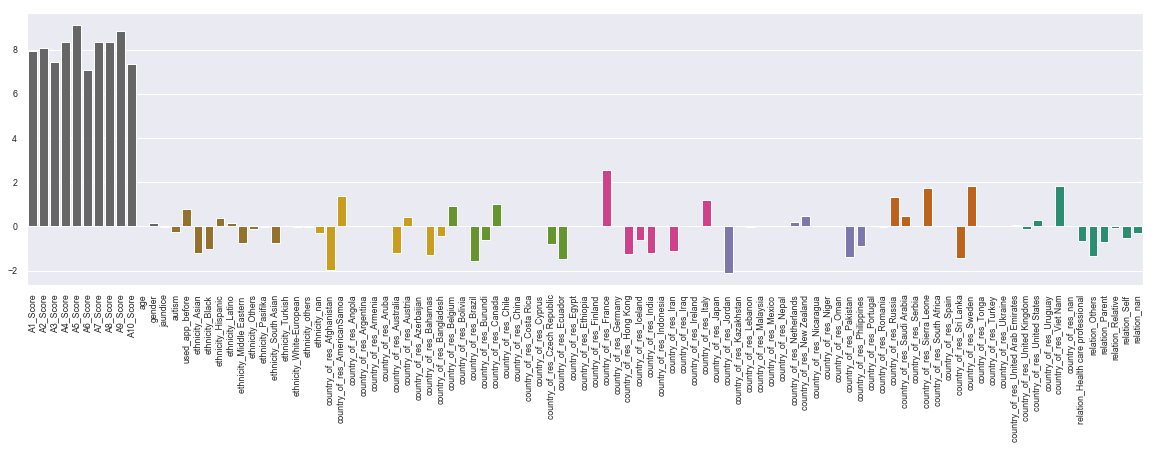

In [363]:
## Visualize your evaluation results. 
## Hint: Check Seaborn for something that could help you with this.
sns.set(font_scale = 0.8)

fig, ax = plt.subplots(figsize=(20,5))

y = LogitModel.coef_[0]
x = features.columns

ax = sns.barplot(x,
                y,
                palette="Dark2_r"
                )

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

##### Evaluation: As expected, the results depend on the A1-A10 scores which determined the 'result' column as seen previously by the linear regression between scores and result whick gave a regression score of 1. The Class/ASD score (0 or 1) is entirely dependant on the 'result' (as seen by the scatterplot between result and classification), hence essentially the class can be determined by these scores alone.

In [364]:
# Part 2c (contd.) 
## Report the performance of your model. Show multiple metrics. 

# The model seems to be performing perfectly on the test data based on the confusion matrix.
# The model managed to get the mean square error down to zero (regression score for train data to 1)
# and the regression score for test data to 1 as well

# So far my claim is that the model would do better if the all the weights were zero except for the A1-A10 scores,
# seen by the regression score of 1 between the score columns and result column, which shows that the result is
# computed using only the scores. We also saw that the classification is based on the result alone, with people
# with a result 6 always being classified as Autistic, and those with 6 an dbelow score always being classified as
# not-Autistic

## Part 3: Regularization

Regularization is essential to reduce the amount of overfitting in your
model. For this part of the assignment, we will be using both the L1
and L2 regularization models.


## L1 Regularization/Lasso Regularization (10 marks)

Recall what you learnt in class about L1 regularization. It aims to 
reduce the model, by eliminating what it estimates to be the least
important features. Due to this, it is relatively unstable and robust.

You are required to use an in-built function to regularize the data
using L1 regularization. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.


mean squared error:  0.0
Train Score:  1.0
Test score:  1.0


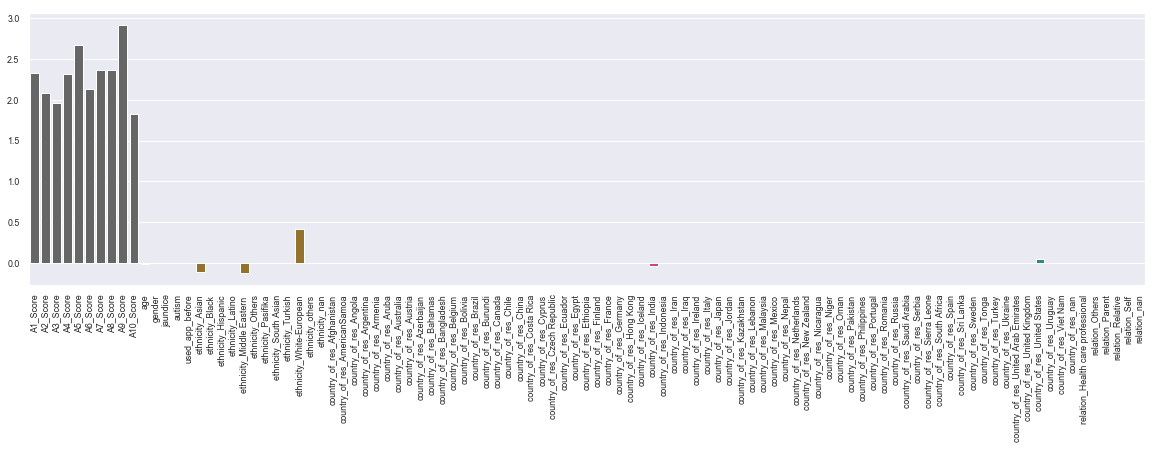

array([[ 36,   0],
       [  0, 105]], dtype=int64)

In [365]:
from sklearn.linear_model import Lasso
sns.set(font_scale = 0.8)

L_LogitModel = LogisticRegressionCV(cv = 4, solver='liblinear', penalty ='l1', Cs=[1, 0.99, 0.98, 0.9, 0.8, 0.2,0.1]).fit(X_train, y_train)

y_pred = L_LogitModel.predict(X_test)
err = mean_squared_error(y_pred, y_test)
print("mean squared error: ", err)

print("Train Score: ", L_LogitModel.score(X_train, y_train))
print("Test score: ", L_LogitModel.score(X_test, y_test))

## Once this is done, report and visualize the performance of this model.

y = L_LogitModel.coef_[0]
x = features.columns

fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale = 0.8)

ax = sns.barplot(x,
                y,
                palette="Dark2_r"
                )

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

confusion_matrix(y_test, y_pred, labels=[1, 0])

perfect score again, with the confusion matirx showing no false positives or false negatives

## L2 Regularization/Ridge Regularization (10 marks)

To understand Ridge Regularization, we need to refer to what happens 
during gradient descent, during model coefficient training.
Our initial weights are updated according to a gradient update rule,
using a learning rate and a gradient. Ridge regression adds a penalty
to this update. Consequently, this shrinks the size of our weights.

L2 is more stable and less robust than L1. It also does not encourage
sparsity, as unlike L1, weights are never assigned to be 0. Hence, even 
the least important features are considered (albeit to a smaller degree).

For this part, you are required to follow the exact same steps as the
previous one. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.
<br>

Train Score:  1.0
Test score:  0.9858156028368794
mean squared error:  0.014184397163120567


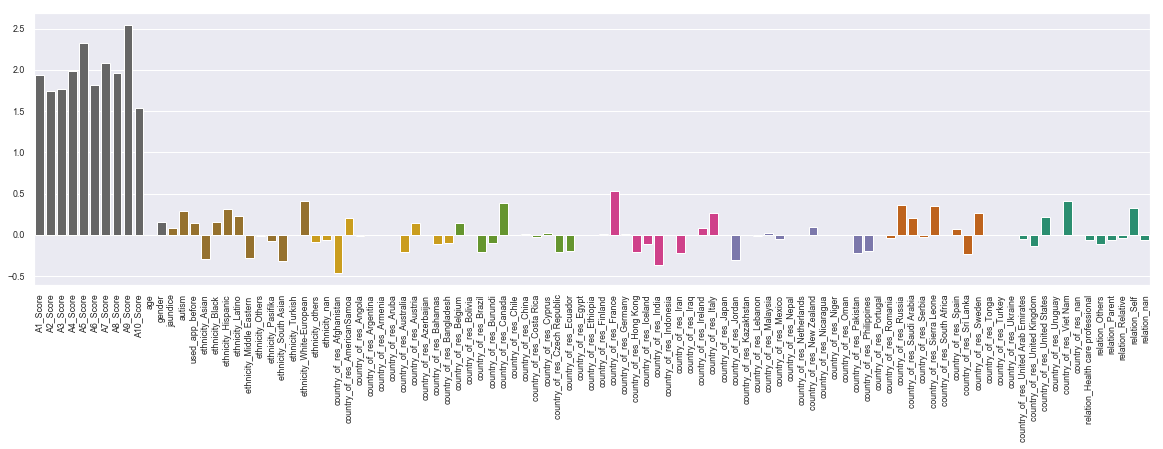

In [366]:
from sklearn.linear_model import Ridge 

R_LogitModel = LogisticRegressionCV(cv = 4, penalty ='l2', \
                                    Cs=[1, 0.99, 0.98, 0.9, 0.8, 0.2, 0.11, 0.1]) \
                                    .fit(X_train, y_train)

print("Train Score: ", R_LogitModel.score(X_train, y_train))
print("Test score: ", R_LogitModel.score(X_test, y_test))

y_pred = R_LogitModel.predict(X_test)
err = mean_squared_error(y_pred, y_test)
print("mean squared error: ", err)


## Report and visualize the performance of this regularized model.


y = R_LogitModel.coef_[0]
x = features.columns

fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale = 0.8)

ax = sns.barplot(x,
                y,
                palette="Dark2_r"
                )

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

confusion_matrix(y_test, y_pred, labels=[1, 0])

y = pd.DataFrame(LogitModel.predict_proba(features))[1]

Using the L2 regularization gives a slightly worse result, with 1 false negative and 1 false positive. This is expected because we are expecting the weights of the A1-A10 scores to be really high and the irrelevant columns' (such as 'jaundice' which we know to be independant of autism) weights to go to zero i.e to get a sparse solution. Giving non zero weights to the irrelevant columns makes the model less rubust to test data.

## Questions (5 marks)

Q. Comment on the performance of the regularized models L1 and L2 compared 
to one another, as well as to the non-regularized model in Part 2. <br>

A. The non-regularized model did as well as the L1 model; they both managed to correctly classify the test data. I would guess that if there was more data the L1 model would perform better than the non regularized model, because our data contains a lot of colums which we expect to not have an impact on the classification i.e the number of dimentions are much higher than needed hence we need to ensure a sparse solution.

The L2 model did worse than the other two as expected with 1 false negative and 1 false positive.

Q. What do you think are the causes of these results? <br>

A.  The result shows that L2 regularization gave a worse result than L1, which is expected because we are expecting the weights of the A1-A10 scores to be really high and the irrelevant columns' (extra dimentions) weights to go to zero i.e to get a sparse solution. Giving non zero, albiet small, weights to the irrelevant columns (L2 regularization) makes the model less rubust to test data.



*End of Question 1*

## Question 2: Multiclass Classification (80 marks)

This question is in the same vein as the last. You are provided with the 
Glass dataset. You have to infer the type of glass given its chemical
composition.

For this question, you are working with "Glass.csv" which has been attached alongside this assignment. Check out the README for this file to get a better understanding of its attributes.

In [367]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Glass.csv")

# Have a quick look at the data.
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [368]:
print(df.isnull().sum())
df.describe()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64


,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Part 1a: Short questions (5 marks)
    
Q. Identify the target variable and its range of values. </br>

A. Type of glass, given the the 'type' column, in the range (1-7).

Q. Of the classifiers discussed in class, which one will you use for this
dataset, and why? </br>

A. Multiclass Logistic Regression using one-vs-rest approach in scikit learn.

Q. Does the data need any preprocessing? </br>

A. No, beacause data is not categorical (all data is numerical) and there are no null values.

## Part 1b: Visualization (5 marks)

In [369]:
## Visualize all possible relationships between variables within the data.
df = df.drop('ID', axis=1)

cols = list(df.columns)
cols.remove('type')

features = df[cols]
target = df['type']

In [370]:
features.head()
target.head()

0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

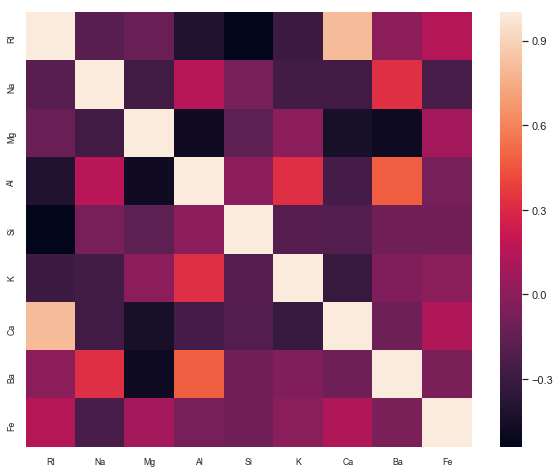

In [371]:
corr = features.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.set()
ax = sns.heatmap(corr)

Ca and Ra as well as Ba and Al show a relatively high correlation, I will attempt to visualise that further.
Otherwise the correlation is pretty low for individual two indivisual features.

[Text(0,0.5,'features'), Text(0.5,0,'correlation coeff.')]

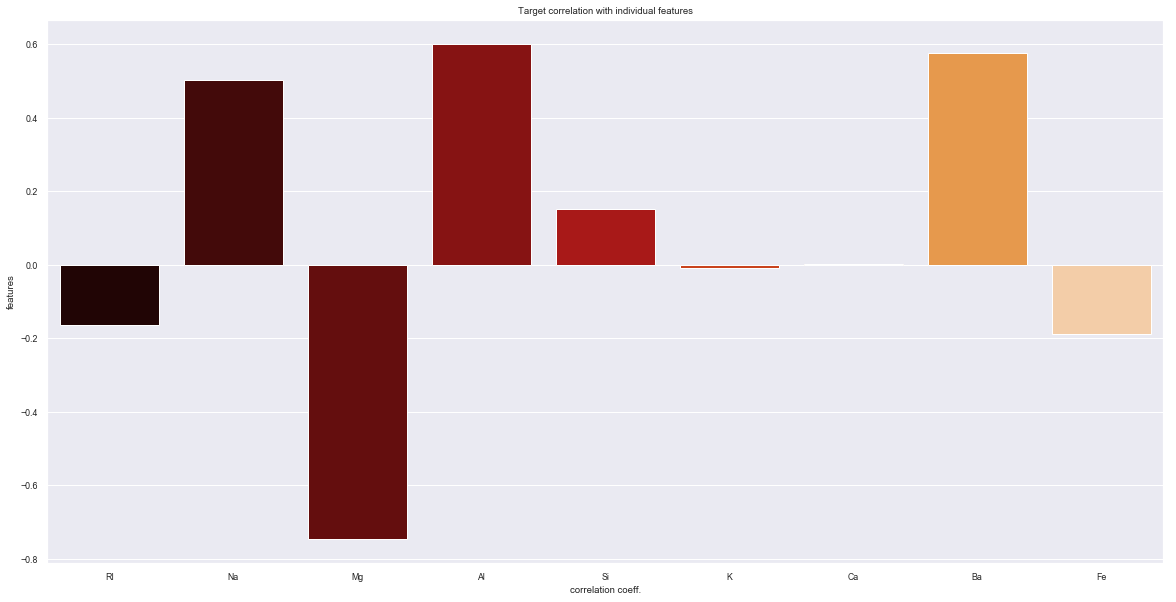

In [472]:
individualCorr = features.corrwith(target)
individualCorr = pd.DataFrame(individualCorr)
individualCorr.columns = ['target correlation']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x = individualCorr.index,
                 y = individualCorr['target correlation'],
                 palette= 'gist_heat'
                )

ax.set_title("Target correlation with individual features")
ax.set(xlabel='correlation coeff.', ylabel='features')

This shows that Magnesium, Aluminium and Barium impact the classification 'Type of Glass' (target variable) the most, while Potassium Silicon and the RefractiveIndex do not have a high correlation with it.

## Part 2a: Data splitting (5 marks)

In [373]:
## Split the data into train-test groups, using the method of your choice.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=1)

## Part 2b: Making the Model (10 marks)

For this part you have two options for classifiers: Softmax Classifier 
or One-vs-Rest classification. Use one of these to model your data.

You are required to research this on your own. 

For guidance on Softmax, you can refer to __[this](https://towardsdatascience.com/the-softmax-function-neural-net-outputs-as-probabilities-and-ensemble-classifiers-9bd94d75932)__.

To learn more about One-vs-Rest classifier, check __[this](https://www.coursera.org/lecture/machine-learning/multiclass-classification-one-vs-all-68Pol)__ out. 


In [462]:
## Make your model
from sklearn.metrics import confusion_matrix

# making the regularisation term very larger to minimise regularisation in non regularised model
clf = LogisticRegressionCV(cv = 4, Cs = 10^100, multi_class='multinomial').fit(X_train, y_train)

print("Train Score: ", clf.score(X_train, y_train))
print("Test score: ", clf.score(X_test, y_test))

## Report and visualize the performance of this regularized model.

y = clf.coef_[0]
x = features.columns

## Validate model with test data

y_pred = clf.predict(X_test)

Train Score:  0.6842105263157895
Test score:  0.6511627906976745


## Part 2c: Testing the Model (15 marks)

In [463]:
## Show the accuracy of your model. Use the appropriate performance metrics.

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[14  5  0  0  0  0]
 [ 1  8  0  1  1  1]
 [ 3  3  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


False positived and false negatives seen in confusion matrix, and many of the diagonal entries show zeros and ones showing that in some case (types 3, 4, 5) none or only one of the cases was correctly classified. However looking closely shows that in the case of type 3 glass it was incorrectly classified as 1 and 2 (3 times each), however there was only one instance of type 4 and 5 each, which were both classified correctly.

Overall the confusion matrix looks promising, classifying a large percentage of the types correctly, with most of the matrix concentrated at the center.

## Part 2d: Visualize the model's results (5 marks)

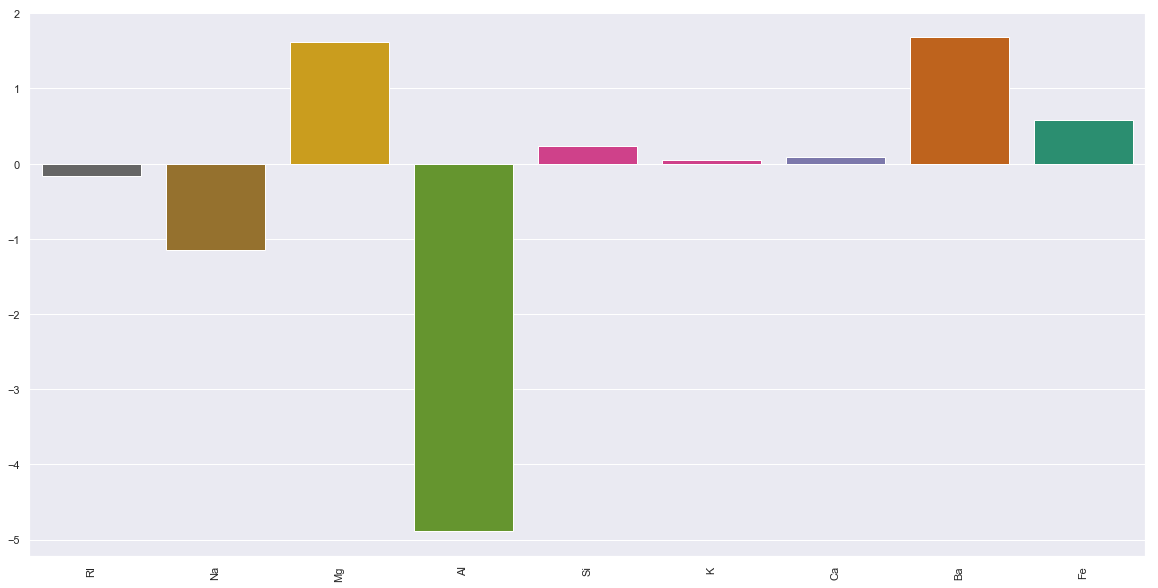

In [376]:
# Write code here
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(x,
                y,
                palette="Dark2_r"
                )

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

The height weight is concentrated on Aluminium, and Magnesium, Barium and Sodium have lower weights. The rest of the attributes have almost negligible weights relative to the these.

## Part 3: Regularization

As with the previous parts, you are required to regularize the multiclass 
model.

## L1 Regularization/Lasso Regularization (15 marks)

You are required to use an in-built function to regularize the data
using L1 regularization. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.

In [466]:
from sklearn.linear_model import Lasso
# Write code here

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

# using L1 norm: Lasso
Lclf = LogisticRegressionCV(cv = 4, solver='saga', multi_class='multinomial', \
                            Cs=[1, 0.99, 0.98, 0.9, 0.8, 0.2, 0.11, 0.1], \
                            max_iter=6000, penalty ='l1').fit(X_train, y_train)

Train Score:  0.6081871345029239
Test score:  0.6511627906976745


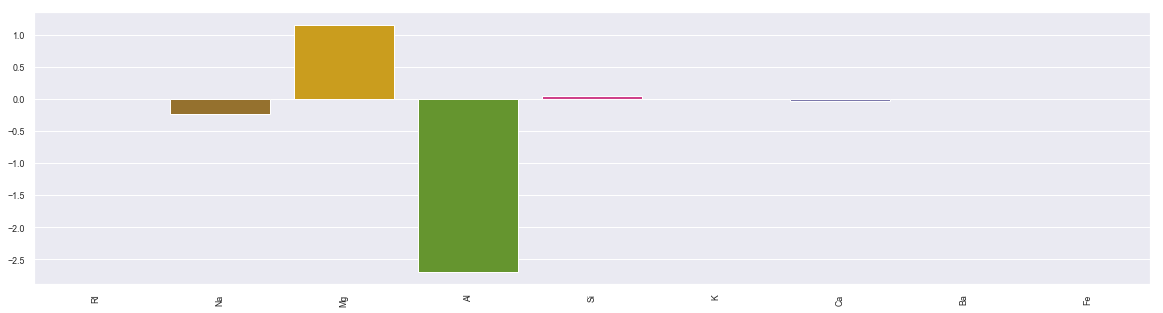

[[13  6  0  0  0  0]
 [ 1  9  0  1  1  0]
 [ 3  3  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


In [467]:
y_pred = Lclf.predict(X_test)

print("Train Score: ", Lclf.score(X_train, y_train))
print("Test score: ", Lclf.score(X_test, y_test))

## Once this is done, report and visualize the performance of this model.

y = Lclf.coef_[0]
x = features.columns

fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale = 0.8)

ax = sns.barplot(x,
                y,
                palette="Dark2_r"
                )

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

print(confusion_matrix(y_test, y_pred))

The L1 regularisation is forcing the smaller weights to zero as it should, it performs equally well on the test data but the score for train data is higher for the non regularised model.

The two confusion matrices are pretty similar, so its hard to draw a conclusion on which performs better.

## L2 Regularization/Ridge Regularization (15 marks)

For this part, you are required to follow the exact same steps as the
previous one.

Be sure to play around with the parameters to get the model with the
best results. Show your process.


Train Score:  0.6783625730994152
Test score:  0.6744186046511628


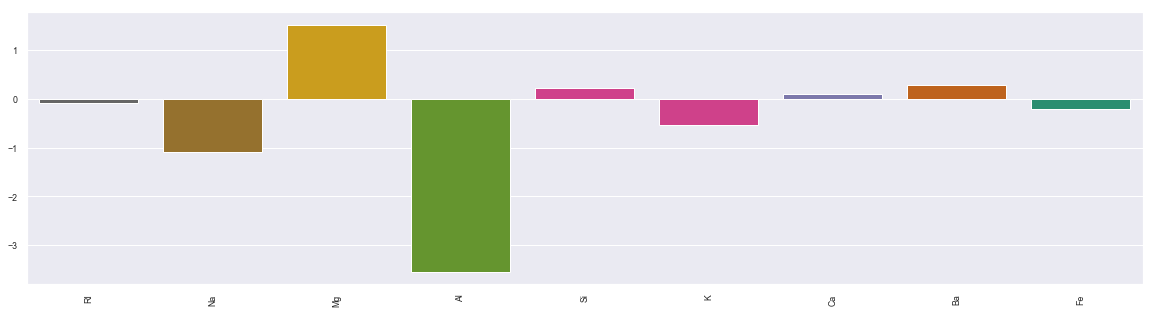

[[15  4  0  0  0  0]
 [ 1  8  0  1  1  1]
 [ 3  3  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


In [444]:
from sklearn.linear_model import Ridge 
# Write code here

Rclf = LogisticRegressionCV(cv = 4, multi_class='multinomial', random_state = 4,\
                            Cs=[10, 9.8, 9, 8, 0.2, 0.1, 0.01]) \
                                    .fit(X_train, y_train)

print("Train Score: ", Rclf.score(X_train, y_train))
print("Test score: ", Rclf.score(X_test, y_test))

y_pred = Rclf.predict(X_test)

## Report and visualize the performance of this regularized model.

y = Rclf.coef_[0]
x = features.columns

fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale = 0.8)

ax = sns.barplot(x,
                y,
                palette="Dark2_r"
                )

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

print(confusion_matrix(y_test, y_pred))

The L2 regularised performs better than the previous two in both test and train scores. It has fewer false negatives and false positives as well. Its diagonals have larger values.

## Questions (5 marks)

Q. Comment on the performance of the regularized models L1 and L2 compared 
to one another, as well as to the non-regularized model in Part 2.

A .The L2 regularised performs better than the L1 and non-regularised model. The L1 model perfroms slightly better than the non regularised model (explained in the nex question).

Q.What do you think are the causes of these results? 
The reason the L2 regularisation performs better may be becasue the L1 forces many of the weights to zero and the non-regularised model may be overfitting. L2 manages to reduce overfitting.
The non-regularised model seems to overfit on the train data giving a relatively higher score for train (0.68) and lower for test (0.65), whereas the L1 model performs about equally on both test and train. The two models give very close scores for test data.

Q. Comment on the results of regularization on the Autism dataset versus
the Glass dataset. Are the results similar? Are they different? What 
affects these results? 

A. The results are very different, the model learnt much better on the autism data and could predict the test data much better compared to the Glass dataset. The Glass dataset also had multiple classes so prediction should require more data, but the dataset was very small with one class containing only 9 datapoints. This may be a reason as to why the score for test data remained around 0.65-0.67 whereas the autism score was around 0.98-1.

*End of Question 2*